In [1]:
import torch
import warnings

warnings.filterwarnings('ignore')

In [2]:
state_dict = torch.load('checkpoints/state_dict')

In [3]:
from models.generator import Generator
from models.discriminator import Discriminator

In [4]:
args = state_dict['args']
generator = Generator(
        dim=args.dim,
        style_dim=args.style_dim,
        n_style_layers=args.n_style_layers,
        n_heads=args.n_heads,
        resolution=args.resolution,
        attn_drop=args.attn_drop
    )

In [5]:
discriminator = Discriminator(
    n_activ_maps=args.n_activ_maps,
    n_channels=3,
    resolution=args.resolution
)

In [23]:
args = state_dict['args']
style_dim = args.style_dim
noise = torch.randn((1, style_dim))
img1 = generator(noise)
img2 = generator(noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 127.5, 127.5, -0.5)

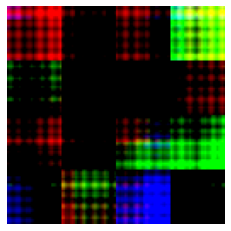

In [24]:
import matplotlib.pyplot as plt
img = img1[0].permute(1,2,0).detach()
plt.imshow(img)
plt.axis('off')

In [8]:
fake_img = torch.rand_like(img2)
discriminator(fake_img)

tensor([[[[0.1079]]]], grad_fn=<LeakyReluBackward0>)

In [9]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [10]:
def get_data_loader(datasetname, root, batch_size):
  if datasetname == 'LSUN':
      dataset = torchvision.datasets.LSUN(
                    root = root,
                    classes = ['church_outdoor_train'],
                    transform = transforms.Compose([
                              transforms.Resize(64),
                              transforms.CenterCrop(64),
                              transforms.ToTensor()
                              ])
                    )
      dataloader = torch.utils.data.DataLoader(
                              dataset,
                              batch_size = batch_size,
                              num_workers = 2,
                              pin_memory = True
      )

  else:
    raise ValueError(f'No dataset named {datasetname}!')
  
  return dataloader

In [11]:
# Dataset
datasetname = 'LSUN'
# Data Root
root = 'data/'
# Parameters
batch_size = 2
# Get Dataloader
loader = get_data_loader(datasetname, root, batch_size)

In [12]:
def visualize_data(loader, n):
  m = n * n
  for i in range(1, m + 1):
    plt.subplot(n, n, i)
    data = next(iter(loader))[0][i].permute(1, 2, 0)
    print(data.shape)
    # print(discriminator(data.reshape(1, 64, 64, 3).permute(0, 3, 1, 2)))
    plt.imshow(data)

torch.Size([64, 64, 3])


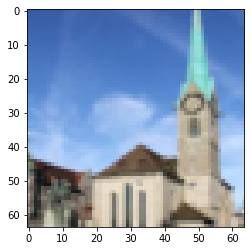

In [13]:
visualize_data(loader, 1)

In [14]:
torch.sum(img1!=img2)

tensor(0)

torch.Size([64, 64, 3])


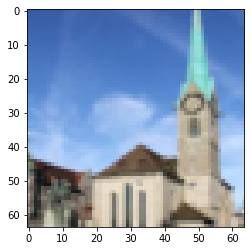

In [15]:
visualize_data(loader, 1)

In [16]:
print(img2.min())
print(img2.max())

tensor(-3.4447, grad_fn=<MinBackward1>)
tensor(2.2053, grad_fn=<MaxBackward1>)


In [17]:
t = noise

In [18]:
t

tensor([[ 0.0337,  1.3413,  0.8742,  0.5776,  0.5340, -0.0796, -0.3085,  0.6348,
          1.7184, -0.0671,  0.4388, -1.3445, -0.4357,  0.4501,  1.7818,  0.6954,
         -1.0002,  0.9607, -0.4039,  0.1380, -0.5536, -0.7974, -1.4547,  0.2249,
          1.2250, -0.1090, -0.5121,  0.1837, -0.4164, -0.4939,  0.6791,  0.5699,
          0.9147, -2.8565, -1.5158, -1.2901,  0.2050,  0.2851,  0.7708, -0.9492,
         -0.6759, -1.4428,  1.5744, -1.1494,  0.6850, -0.4544,  1.5611, -0.9955,
         -0.1663,  1.8056, -0.4448, -0.5505, -0.2811,  0.6698,  0.7933, -1.4141,
         -0.1166,  0.4678,  0.8361, -0.7233, -0.5931, -0.6389, -0.2828, -0.8102]])

In [19]:
t==noise

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True]])

In [20]:
noise

tensor([[ 0.0337,  1.3413,  0.8742,  0.5776,  0.5340, -0.0796, -0.3085,  0.6348,
          1.7184, -0.0671,  0.4388, -1.3445, -0.4357,  0.4501,  1.7818,  0.6954,
         -1.0002,  0.9607, -0.4039,  0.1380, -0.5536, -0.7974, -1.4547,  0.2249,
          1.2250, -0.1090, -0.5121,  0.1837, -0.4164, -0.4939,  0.6791,  0.5699,
          0.9147, -2.8565, -1.5158, -1.2901,  0.2050,  0.2851,  0.7708, -0.9492,
         -0.6759, -1.4428,  1.5744, -1.1494,  0.6850, -0.4544,  1.5611, -0.9955,
         -0.1663,  1.8056, -0.4448, -0.5505, -0.2811,  0.6698,  0.7933, -1.4141,
         -0.1166,  0.4678,  0.8361, -0.7233, -0.5931, -0.6389, -0.2828, -0.8102]])

In [21]:
len(loader)

63114

In [22]:
loader.batch_size

2